#**Group Exercise 6 - Roof Ridge**
In this notebook, We will examine the inviscid flow around a roof ridge and determine the associated physical quantities.


We will model the inviscid flow around a roof ridge by superimposing three elementary flows: a parallel flow, a dipole flow, and a potential vortex. The stream function $\Psi$ of this flow is given by:

*$$*
\Psi = \Psi_P + \Psi_D + \Psi_{PV} = U_{\infty} \cdot y - \frac{M}{\pi} \cdot \frac{y}{x^2 + y^2} - \frac{\Gamma}{2\pi} \cdot \ln\left(\sqrt{x^2 + y^2} \right ).
$$

Given: $\alpha = 120^{\circ}$, $R = 7.5\,cm$, $g=9.81 \,\frac{m}{s^2}$, $\rho = 1.226 \,\frac{kg}{m^3}$, $b = 40\,cm$

![Roof ridge sketch](./content/dachfirst.PNG) <!-- You can include an image if you have one -->

Let's work through the following questions:


# Preparation
To prepare the plot, several helper functions have to be defined. This is done in the following cell. First, the two libraries numpy and matplotlib.pyplot have to be imported in order to user their functionality. Note, these libraries are helpful in many scenarios, when data should be plotted. Next, helper classes that provide the complex velocity for the vortex flow (PotentialVortexFlow), the parallel flow (ParallelFlow), and the dipole flow (DipoleFlow) are implemented. Finally, a function providing the meshgrid for the calculations is implemented.

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Define important colors
TUMOrange = "#E37222"
TUMBlue = "#3070b3"

# Define helper classes to get the complex velocity of elementary flows
class PotentialVortexFlow:

    def __init__(self, gamma: float, translation_x: float = 0.0, translation_y: float = 0.0) -> None:
        """Initializer for the vortex flow class. Stores relevant quantities as class members.

        Args:
            gamma (float): The strength of the sourcce flow. It is positive for source flow and negative for sink flow.
            translation_x (float, optional): The translation of the singularity in x direction. Defaults to 0.0.
            translation_y (float, optional): The translation of the singularity in y direction. Defaults to 0.0.
        """
        self.translation_x = translation_x
        self.translation_y = translation_y
        self.gamma = gamma
        self.factor = self.gamma / (2.0 * np.pi)

    def get_complex_velocity(self, z: np.array) -> np.array:
        """Returns the complex velocity of the vortex flow.

        Args:
            z (np.array): Complex numpy array containing the meshgrid of the complex variable z.

        Returns:
            np.array: The complex velocity as a complex numpy array.
        """
        z_translated = z - self.translation_x - 1.0j * self.translation_y
        return - 1.0j * self.factor / z_translated


class ParallelFlow:

    def __init__(self, velocity_x: float, velocity_y: float) -> None:
        """Initializer for the parallel flow class. Stores relevant quantities as class members.

        Args:
            velocity_x (float): Cartesion component of the velocity pointing in x-direction.
            velocity_y (float): Cartesion component of the velocity pointing in y-direction.
        """
        self.velocity_x = velocity_x
        self.velocity_y = velocity_y

    def get_complex_velocity(self, z: np.array) -> np.array:
        """Return the complex velocity of the parallel flow.

        Args:
            z (np.array): Complex numpy array containing the meshgrid of the complex variable z.

        Returns:
            np.array: The complex velocity as a complex numpy array.
        """
        return self.velocity_x - 1.0j * self.velocity_y


class DipoleFlow:

    def __init__(self, dipole_moment, translation_x = 0.0, translation_y = 0.0) -> None:
        """Initializer for the dipole class. Stores relevant quantities as class members.

        Args:
            dipole_moment (float): The dipole moment.
            translation_x (float, optional): The translation of the singularity in x direction. Defaults to 0.0.
            translation_y (float, optional): The translation of the singularity in y direction. Defaults to 0.0.
        """
        self.dipole_moment = dipole_moment
        self.translation_x = translation_x
        self.translation_y = translation_y
        self.factor = self.dipole_moment / np.pi

    def get_complex_velocity(self, z):
        """Returns the complex velocity of the source-/sink-flow.

        Args:
            z (np.array): Complex numpy array containing the meshgrid of the complex variable z.

        Returns:
            np.array: The complex velocity as a complex numpy array.
        """
        z_translated = z - self.translation_x - 1.0j * self.translation_y
        return - self.factor / (z_translated*z_translated)


def get_grid_quantities(x_min: float, x_max: float, y_min: float, y_max: float, resolution_x: int, resolution_y: int):
    """Returns the meshgrid used for the calculations.

    Args:
        x_min (float): The minimum x value.
        x_max (float): The maximum x value.
        y_min (float): The minimum y value.
        y_max (float): The maximum y value.
        resolution_x (int): The number of points to discretize in x direction.
        resolution_y (int): The number of points to discretize in y direction.

    Returns:
        List[np.array]: The numpy array containing the meshgrid.
    """
    x_linspace = np.linspace(x_min, x_max, resolution_x)
    y_linspace = np.linspace(y_min, y_max, resolution_y)
    X_meshgrid, Y_meshgrid = np.meshgrid(x_linspace, y_linspace)
    Z_meshgrid = X_meshgrid + 1.0j * Y_meshgrid
    return X_meshgrid, Y_meshgrid, Z_meshgrid

## Definition of domain

Here, relevant information to describe the domain is provided. It is used to generate the meshgrid for the calculations.

In [45]:
x_min = -2.0
x_max = 2.0
y_min = -2.0
y_max = 2.0
resolution_per_unit_length = 20
resolution_x = ( x_max - x_min ) * resolution_per_unit_length
resolution_y = ( y_max - y_min ) * resolution_per_unit_length

X_meshgrid, Y_meshgrid, Z_meshgrid = get_grid_quantities(x_min, x_max, y_min, y_max, int(resolution_x), int(resolution_y))

## Calculation of the complex velocity

Initializes the relevant parallel, dipole and vortex flow objects to calculate the complex velocity.

In [46]:
u_infty = 1.0
radius = 0.5
gamma = -2.0

dipole_moment = u_infty * np.pi * radius**2

dipole = DipoleFlow(dipole_moment, 0.0, 0.0)
inflow = ParallelFlow(u_infty, 0.0)
vortex_flow = PotentialVortexFlow(gamma, 0.0, 0.0)


complex_velocity = inflow.get_complex_velocity(Z_meshgrid) \
                   + dipole.get_complex_velocity(Z_meshgrid) \
                   + vortex_flow.get_complex_velocity(Z_meshgrid)

u = np.real(complex_velocity)
v = - np.imag(complex_velocity)

## Plotting of the results

Plot the streamlines and potential lines.
Streamlines are plotted in TUMBlue.
The stagnation streamline is highlighted in red.
Potential lines are plotted in TUMOrange.
The contour of the wedge is plotted in black.

[[-0.4330127 -0.25     ]]


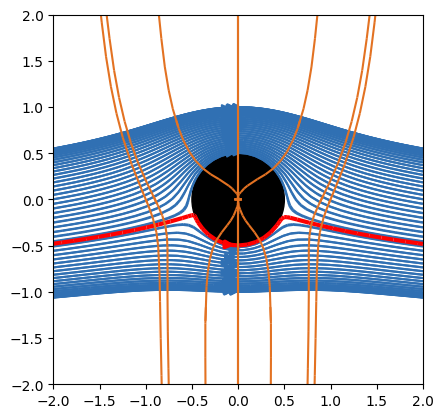

In [47]:
fig, ax = plt.subplots()

# Plot the streamlines.

# The streamline seeds describe all the points where streamlines start. Thus, only streamline the go through these points are drawn.
# This may heavily influence the look of the plot!
# In this case only points to the left (*xmin refers to the left, replace with e.g. 0.0 to also obtain streamlines inside the oval)
# of the oval are choosen. Thus, no streamlines inside the oval show.
# In this case, they are equally distributed along the y direction. To also indicate the stagnation streamlines, values slightly above
# and below (+/- 1.e-5) the x axis are added.
radius_for_seeds = 1.0
phi_linspace = np.linspace(0.0, 2*np.pi, 100)
x_seeds = radius_for_seeds * np.sin(phi_linspace)
y_seeds = radius_for_seeds * np.cos(phi_linspace)
streamline_seeds = np.stack([x_seeds, y_seeds], axis=-1)

ax.streamplot(
    X_meshgrid, Y_meshgrid, u, v,
    density=[1.0, 1.0],
    minlength=1.0, maxlength=10.0,
    broken_streamlines=False,
    start_points=streamline_seeds,
    color=TUMBlue,
)

# Plot the stagnation line

import math
# Given values
r = radius
theta = 7 * math.pi / 6

stagnation_point_x = r * math.cos(theta)
stagnation_point_y = r * math.sin(theta)
stagnation_streamline_seed = np.array([stagnation_point_x, stagnation_point_y]).reshape([1,2])
print(stagnation_streamline_seed)

ax.streamplot(
    X_meshgrid, Y_meshgrid, u, v,
    minlength=1.0, maxlength=20.0,
    broken_streamlines=False,
    start_points=stagnation_streamline_seed,
    color="red",
    linewidth=3.0,
)

# Plot the potential lines.

# The potential line seed describe all points where potential lines start. Here, similar remarks as above apply.
radius_for_seeds = 1.0
phi_linspace = np.linspace(0.0, 2*np.pi, 10)
x_seeds = radius_for_seeds * np.sin(phi_linspace)
y_seeds = radius_for_seeds * np.cos(phi_linspace)
potential_line_seeds = np.stack([x_seeds, y_seeds], axis=-1)

ax.streamplot(
    X_meshgrid, Y_meshgrid, -v, u,
    density=[0.2, 0.2],
    # minlength=1.0, maxlength=20.0,
    broken_streamlines=False,
    start_points=potential_line_seeds,
    arrowstyle = "-",
    color=TUMOrange,
)

# Plot a circle at the origin with radius r
from matplotlib.patches import Circle
circle = Circle((0, 0), radius, color='black', fill=True) # You can set fill=True if you want the circle filled
ax.add_patch(circle)


ax.set_aspect('equal', 'box')
plt.show()

# Pressure Distribution Around a Roof Ridge

## Background

In fluid mechanics, the pressure distribution around objects is an essential aspect to understand how the fluid interacts with these objects. For example, in the case of a roof ridge, the pressure distribution can determine the forces exerted by the wind on the roof, which is crucial for engineering and design.

## Approach

In this notebook, we will use a simplified model to calculate and visualize the pressure distribution around a roof ridge as a function of angle.


We obtain the pressure function using the Bernoulli equation for incompressible flows:
$$
p(\varphi) = p_{\infty} - \frac{\rho}{2} \cdot U_{\infty}^2 \cdot \left(4 \cdot \sin ^2(\varphi) + 4 \cdot \sin (\varphi)\right)
$$
where $p_{\infty}$ is the pressure at infinity, $\rho$ is the density of the fluid, $U_{\infty}$ is the velocity of the fluid at infinity, and $\varphi$ is the angle around the roof ridge.


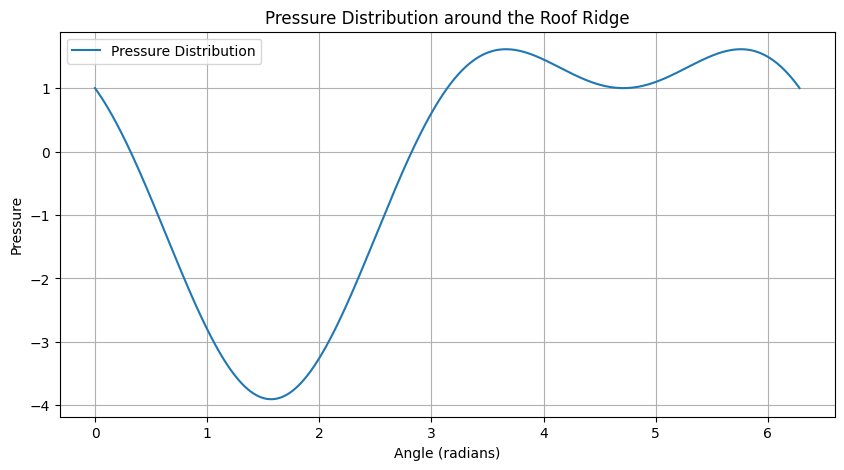

In [48]:
# Given values
p_infinity = 1.0  # Example value for p_infinity, adjust as needed
rho = 1.226       # Density in kg/m^3
U_infinity = 1.0  # Example value for U_infinity, adjust as needed

# Define the pressure function
def pressure_distribution(phi, p_infinity, rho, U_infinity):
    return p_infinity - (rho / 2) * U_infinity**2 * (4 * np.sin(phi)**2 + 4 * np.sin(phi))

# Generate values for phi (0 to 2*pi)
phi_values = np.linspace(0, 2 * np.pi, 1000)

# Calculate the pressure distribution for each value of phi
pressure_values = pressure_distribution(phi_values, p_infinity, rho, U_infinity)

# Plot the pressure distribution
plt.figure(figsize=(10, 5))
plt.plot(phi_values, pressure_values, label='Pressure Distribution')
plt.xlabel('Angle (radians)')
plt.ylabel('Pressure')
plt.title('Pressure Distribution around the Roof Ridge')
plt.legend()
plt.grid(True)
plt.show()


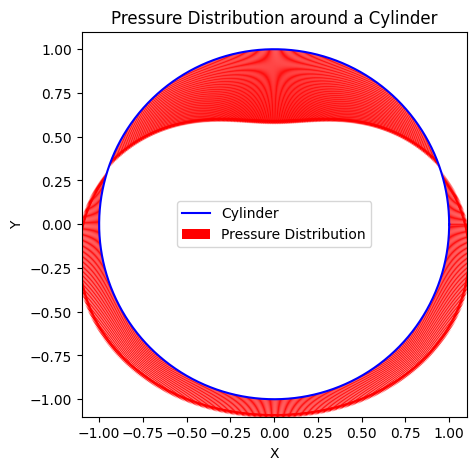

In [49]:
# Given values
p_infinity = 1.0  # Example value for p_infinity, adjust as needed
rho = 1.226       # Density in kg/m^3
U_infinity = 1.0  # Example value for U_infinity, adjust as needed

# Define the pressure function
def pressure_distribution(phi, p_infinity, rho, U_infinity):
    return p_infinity - (rho / 2) * U_infinity**2 * (4 * np.sin(phi)**2 + 4 * np.sin(phi))

# Generate values for phi (0 to 2*pi)
phi_values = np.linspace(0, 2 * np.pi, 1000)

# Calculate the pressure distribution for each value of phi
pressure_values = pressure_distribution(phi_values, p_infinity, rho, U_infinity)

# Convert polar coordinates to cartesian coordinates for plotting
x = np.cos(phi_values)
y = np.sin(phi_values)
pressure_x = pressure_values * np.cos(phi_values)
pressure_y = pressure_values * np.sin(phi_values)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the cylinder (as a circle)
ax.plot(x, y, label='Cylinder', color='blue')

# Plot the pressure distribution
ax.quiver(x, y, pressure_x, pressure_y, color='red', scale=20, label='Pressure Distribution')

# Setting the aspect ratio to be equal to make the circle look like a circle
ax.set_aspect('equal', 'box')

# Labels, title, and legend
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Pressure Distribution around a Cylinder')
ax.legend()

# Show plot
plt.show()


# Velocity Distribution Around a Roof Ridge



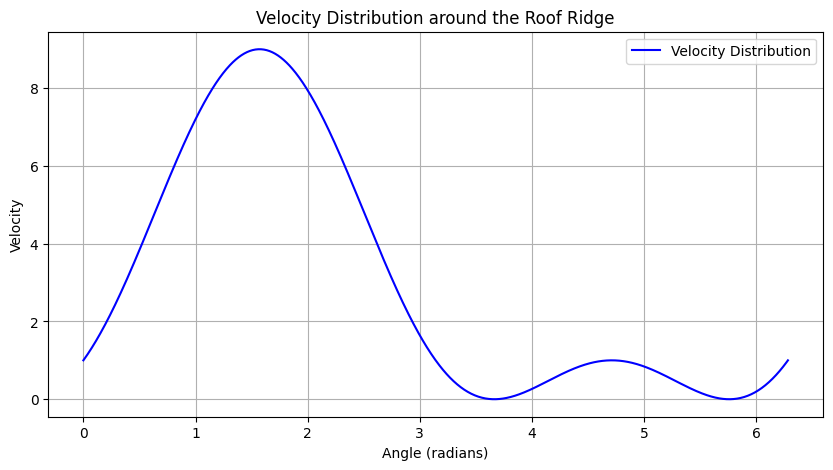

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Given values
U_infinity = 1.0  # Example value for U_infinity, adjust as needed

# Define the velocity distribution function
def velocity_distribution(phi, U_infinity):
    return U_infinity**2 * (4 * np.sin(phi)**2 + 4 * np.sin(phi) + 1)

# Generate values for phi (0 to 2*pi)
phi_values = np.linspace(0, 2 * np.pi, 1000)

# Calculate the velocity distribution for each value of phi
velocity_values = velocity_distribution(phi_values, U_infinity)

# Plot the velocity distribution
plt.figure(figsize=(10, 5))
plt.plot(phi_values, velocity_values, label='Velocity Distribution', color='blue')
plt.xlabel('Angle (radians)')
plt.ylabel('Velocity')
plt.title('Velocity Distribution around the Roof Ridge')
plt.legend()
plt.grid(True)
plt.show()
